In [73]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
df_heladas = pd.read_excel('2017/DISTRITOS_PRIORIZADOS-POR-HELADAS.xlsx')
df_friaje = pd.read_excel('2017/DISTRITOS_PRIORIZADOS-POR-FRIAJE.xlsx')

In [6]:
def fix_headers(df):
    headers = []
    headers.append(np.array(df.columns))
    for i in range(3):
        headers.append(np.array(df.iloc[i]))
    columns = headers[-1]
    for i in range(3):
        columns = [c1 if c1==c1 else c2 for c1, c2 in zip(columns, headers[2-i])]
        df.drop(df.index[0], inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.columns = columns
    return df  

In [7]:
df_heladas = fix_headers(df_heladas)
df_friaje = fix_headers(df_friaje)

In [8]:
df_tambos = pd.read_excel('2017/Anexo 4.xlsx')
df_zonas = pd.read_excel('2017/Anexo 2.xlsx')

# Clean data

### 1. df_heladas

In [9]:
import re

In [10]:
def check_rare_characters(df, column):
    return df[df[column].apply(lambda x: not re.sub(' ', '', x).isalpha())]

In [11]:
print(check_rare_characters(df_heladas, 'Distrito').shape)
print(check_rare_characters(df_heladas, 'Provincia').shape)
print(check_rare_characters(df_heladas, 'Departamento').shape)

(32, 19)
(10, 19)
(0, 19)


In [12]:
# Check for non alphabetic characters
check_rare_characters(df_heladas, 'Distrito')

,Ubigeo distrital,Departamento,Provincia,Distrito,T° Mínima P10 (°C),Frecuencia de heladas (días/mes),Defunciones por neumonías (< a 5 años),Tasa de mortalidad (< a 5 años),Casos de neumonías (< a 5 años),Tasa de neumonías (< a 5 años),Valor del IDS,Incidencia de Pobreza,Tasa de Desnutrición Crónica (< a 5 años),Tasa de Analfabetismo,Porc. viviendas según el material utilizado para cocinar,Nivel de Riesgo MINSA,Total del distrito,Población menor a 5 años,Población de 60 años a más
277,030411,APURIMAC,AYMARAES,SAN JUAN DE CHAC├æA,-5 a 0,2 a 5 dias,0,0,0,0,0.035,46.76,18.9,31.9149,97.7186,MEDIO,842,71,145
278,030412,APURIMAC,AYMARAES,SA├æAYCA,-11 a -5,5 a 10 dias,0,0,0,0,0.035,75.23,28.3,20.5882,91.5761,ALTO,1444,144,240
291,030602,APURIMAC,CHINCHEROS,ANCO_HUALLO,-11 a -5,5 a 10 dias,0,0,0,0,0.035,62.77,29.3,20.5463,86.4736,ALTO,12531,1293,1029
329,040115,AREQUIPA,AREQUIPA,QUEQUE├æA,-5 a 0,2 a 5 dias,0,0,3,29.4118,0.3158,21.26,10.6,4.81507,31.6919,MEDIO,1390,105,266
358,040412,AREQUIPA,CASTILLA,U├æON,-11 a -5,5 a 10 dias,0,0,0,0,0.035,50,5.6,9.74026,88.4615,BAJO,451,35,74
444,050605,AYACUCHO,LUCANAS,CHAVI├æA,-11 a -5,2 a 5 dias,0,0,0,0,0.035,70.44,28.4,17.6248,78.9207,MEDIO,2011,230,273
446,050607,AYACUCHO,LUCANAS,HUAC-HUAS,-11 a -5,2 a 5 dias,0,0,0,0,0.035,44.8,25.4,9.1528,86.771,BAJO,2808,288,363
451,050612,AYACUCHO,LUCANAS,OCA├æA,-11 a -5,5 a 10 dias,0,0,0,0,0.035,61.87,32.5,13.5583,85.8875,MEDIO,2907,222,348
463,050703,AYACUCHO,PARINACOCHAS,CORONEL CASTA├æEDA,-11 a -5,5 a 10 dias,0,0,0,0,0.035,79.9,21.2,24.1852,73.4483,ALTO,1889,191,139
483,050905,AYACUCHO,SUCRE,HUACA├æA,-14 a -11,5 a 10 dias,0,0,0,0,0.035,61.54,25.3,19.0323,96.7949,MEDIO,681,78,97


In [13]:
character_map = {
    '├æ': 'Ñ'
}

In [14]:
def map_df_characters(df, column, character_map):
    for c in character_map:
        df[column] = df[column].apply(lambda x: re.sub(c, character_map[c], x))

In [15]:
map_df_characters(df_heladas, 'Distrito', character_map)

In [16]:
check_rare_characters(df_heladas, 'Distrito')

,Ubigeo distrital,Departamento,Provincia,Distrito,T° Mínima P10 (°C),Frecuencia de heladas (días/mes),Defunciones por neumonías (< a 5 años),Tasa de mortalidad (< a 5 años),Casos de neumonías (< a 5 años),Tasa de neumonías (< a 5 años),Valor del IDS,Incidencia de Pobreza,Tasa de Desnutrición Crónica (< a 5 años),Tasa de Analfabetismo,Porc. viviendas según el material utilizado para cocinar,Nivel de Riesgo MINSA,Total del distrito,Población menor a 5 años,Población de 60 años a más
291,030602,APURIMAC,CHINCHEROS,ANCO_HUALLO,-11 a -5,5 a 10 dias,0,0,0,0,0.035,62.77,29.3,20.5463,86.4736,ALTO,12531,1293,1029
446,050607,AYACUCHO,LUCANAS,HUAC-HUAS,-11 a -5,2 a 5 dias,0,0,0,0,0.035,44.8,25.4,9.1528,86.771,BAJO,2808,288,363
766,090307,HUANCAVELICA,ANGARAES,HUANCA-HUANCA,-11 a -5,5 a 10 dias,0,0,0,0,0.035,71.52,58.8,28,94.6188,ALTO,1753,359,124
804,090609,HUANCAVELICA,HUAYTARA,QUITO-ARMA,-5 a 0,5 a 10 dias,0,0,0,0,0.035,85.43,28.8,28.7968,97.5,ALTO,768,103,124
838,100106,HUANUCO,HUANUCO,QUISQUI (KICHKI),-5 a 0,2 a 5 dias,0,0,4,4.40529,0.17,50.54,29.9,24.1196,95.6347,MEDIO,8270,884,678
1003,120803,JUNIN,YAULI,HUAY-HUAY,-14 a -11,20 a 31 dias,0,0,0,0,0.035,6.38081,38.5,3.43811,32.6613,ALTO,1478,141,100
1366,230404,TACNA,TARATA,ESTIQUE-PAMPA,-11 a -5,0 a 2 dias,0,0,0,0,0.035,20.27,14.3,5.46875,100,BAJO,680,34,140


In [17]:
df_heladas = fix_headers(pd.read_excel('2017/DISTRITOS_PRIORIZADOS-POR-HELADAS.xlsx'))

In [18]:
def preprocess_df(df, column):
    df[column] = df[column].apply(lambda x: re.sub('├æ', 'Ñ', x))
    df[column] = df[column].apply(lambda x: re.sub(r'\([^)]*\)', '', x))
    df[column] = df[column].apply(lambda x: re.sub(r'[^a-zA-Z]+', ' ', x).strip().upper())    

In [19]:
preprocess_df(df_heladas, 'Distrito')
preprocess_df(df_heladas, 'Provincia')
preprocess_df(df_heladas, 'Departamento')

In [20]:
print(check_rare_characters(df_heladas, 'Distrito').shape)
print(check_rare_characters(df_heladas, 'Provincia').shape)
print(check_rare_characters(df_heladas, 'Departamento').shape)

(0, 19)
(0, 19)
(0, 19)


### 2. df_friaje

In [21]:
print(check_rare_characters(df_friaje, 'Distrito').shape)
print(check_rare_characters(df_friaje, 'Provincia').shape)
print(check_rare_characters(df_friaje, 'Departamento').shape)

(2, 18)
(0, 18)
(0, 18)


In [22]:
check_rare_characters(df_friaje, 'Distrito')

,Ubigeo distrital,Departamento,Provincia,Distrito,T° Mínima P5 (°C),Defunciones por neumonías (< a 5 años),Tasa de mortalidad (< a 5 años),Casos de neumonías (< a 5 años),Tasa de neumonías (< a 5 años),Valor del IDS,Incidencia de Pobreza,Tasa de Desnutrición Crónica (< a 5 años),Tasa de Analfabetismo,Porc. viviendas según el material utilizado para cocinar,Nivel de Riesgo MINSA,Total del distrito,Población menor a 5 años,Población de 60 años a más
31,100601,HUANUCO,LEONCIO PRADO,RUPA-RUPA,Menor de 15°C,1,0.179533,41,7.36086,0.1832,23.95,9.3,5.42723,22.9719,MUY ALTO,51063,4449,3573
62,120699,JUNIN,SATIPO,MAZAMARI - PANGOA,15°C a 17°C,0,0,3,0.381971,0.0548,25.4,33.4,10.82,0,ALTO,122279,16272,6158


In [23]:
preprocess_df(df_friaje, 'Distrito')
preprocess_df(df_friaje, 'Provincia')
preprocess_df(df_friaje, 'Departamento')

In [24]:
print(check_rare_characters(df_friaje, 'Distrito').shape)
print(check_rare_characters(df_friaje, 'Provincia').shape)
print(check_rare_characters(df_friaje, 'Departamento').shape)

(0, 18)
(0, 18)
(0, 18)


### 3. df_tambos

In [25]:
print(check_rare_characters(df_tambos, 'Distrito').shape)
print(check_rare_characters(df_tambos, 'Provincia').shape)
print(check_rare_characters(df_tambos, 'Departamento').shape)
print(check_rare_characters(df_tambos, 'DISTRITO').shape)
print(check_rare_characters(df_tambos, 'LOCAL DE DISTRIBUCIÓN DE BIENES').shape)

(3, 11)
(2, 11)
(0, 11)
(8, 11)
(0, 11)


In [26]:
check_rare_characters(df_tambos, 'Distrito')

,N°,Departamento,Provincia,Ubigeo distrital,Distrito,UBIG_TAM,UBIGEO_CCP,UBIGEO_DIS,DISTRITO,CCPP,LOCAL DE DISTRIBUCIÓN DE BIENES
34,35,PUNO,SAN ANTONIO DE\nPUTINA,211003,PEDRO VILCA\nAPAZA,2110030001,2110030001,211003,PEDRO VILCA\nAPAZA,AYRAMPUNI,TAMBO TUPAC AMARU AYRAMPUNI
39,40,APURIMAC,ANTABAMBA,30304,JUAN ESPINOZA\nMEDRANO,303040016,303040016,30304,JUAN ESPINOZA\nMEDRANO,CALCAUSO,TAMBO CALCAUSO
103,104,HUANUCO,LAURICOCHA,101007,SAN MIGUEL DE\nCAURI,1010070001,1010070001,101007,SAN MIGUEL DE\nCAURI,CAURI,TAMBO SAN MIGUEL DE CAURI


In [27]:
def preprocess_df(df, column):
    df[column] = df[column].apply(lambda x: re.sub('├æ', 'Ñ', x))
    df[column] = df[column].apply(lambda x: re.sub(r'\([^)]*\)', '', x))
    df[column] = df[column].apply(lambda x: re.sub(r'[^a-zA-Z]+', ' ', x).strip().upper())    

In [28]:
preprocess_df(df_tambos, 'Distrito')
preprocess_df(df_tambos, 'Provincia')
preprocess_df(df_tambos, 'Departamento')
preprocess_df(df_tambos, 'DISTRITO')
preprocess_df(df_tambos, 'LOCAL DE DISTRIBUCIÓN DE BIENES')

In [29]:
print(check_rare_characters(df_tambos, 'Distrito').shape)
print(check_rare_characters(df_tambos, 'Provincia').shape)
print(check_rare_characters(df_tambos, 'Departamento').shape)
print(check_rare_characters(df_tambos, 'DISTRITO').shape)
print(check_rare_characters(df_tambos, 'LOCAL DE DISTRIBUCIÓN DE BIENES').shape)

(0, 11)
(0, 11)
(0, 11)
(0, 11)
(0, 11)


### 4. df_zonas

In [30]:
print(check_rare_characters(df_zonas, 'DEPARTAMENTO').shape)
print(check_rare_characters(df_zonas, 'PROVINCIA').shape)
print(check_rare_characters(df_zonas, 'DISTRITO').shape)
print(check_rare_characters(df_zonas, 'TAMBO/LOCAL PARA ENTREGA DE  BIENES').shape)

(0, 6)
(0, 6)
(2, 6)
(10, 6)


In [31]:
check_rare_characters(df_zonas, 'DISTRITO')

,N°,DEPARTAMENTO,PROVINCIA,DISTRITO,TAMBO/LOCAL PARA ENTREGA DE BIENES,FECHA DE ENTREGA
184,185,HUANUCO,LEONCIO PRADO,RUPA-RUPA,LOCAL DISTRITAL- TINGO MARÍA (RUPA-RUPA),2017-06-13
192,193,JUNIN,YAULI,HUAY-HUAY,LOCAL DISTRITAL HUAY-HUAY,2017-06-13


In [32]:
preprocess_df(df_zonas, 'DEPARTAMENTO')
preprocess_df(df_zonas, 'PROVINCIA')
preprocess_df(df_zonas, 'DISTRITO')
preprocess_df(df_zonas, 'TAMBO/LOCAL PARA ENTREGA DE  BIENES')

In [33]:
print(check_rare_characters(df_zonas, 'DEPARTAMENTO').shape)
print(check_rare_characters(df_zonas, 'PROVINCIA').shape)
print(check_rare_characters(df_zonas, 'DISTRITO').shape)
print(check_rare_characters(df_zonas, 'TAMBO/LOCAL PARA ENTREGA DE  BIENES').shape)

(0, 6)
(0, 6)
(0, 6)
(0, 6)


## Nivel de Riesgo

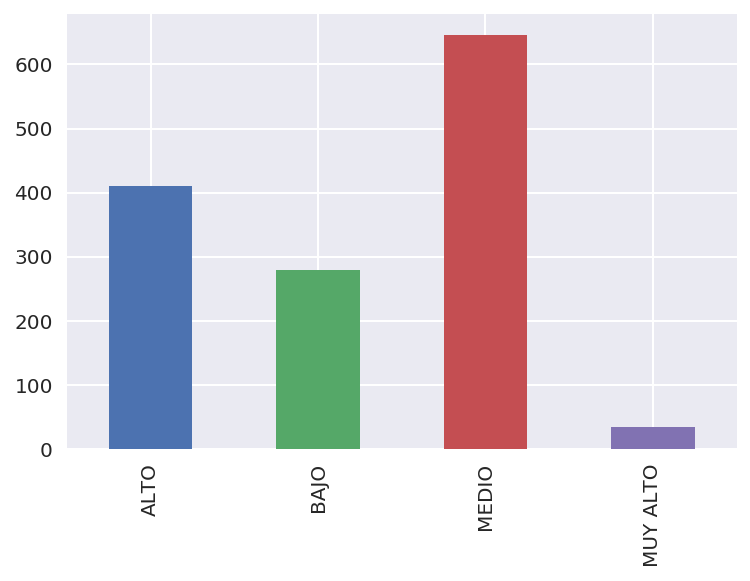

In [49]:
df_heladas['Nivel de Riesgo MINSA'].value_counts().sort_index().plot.bar()

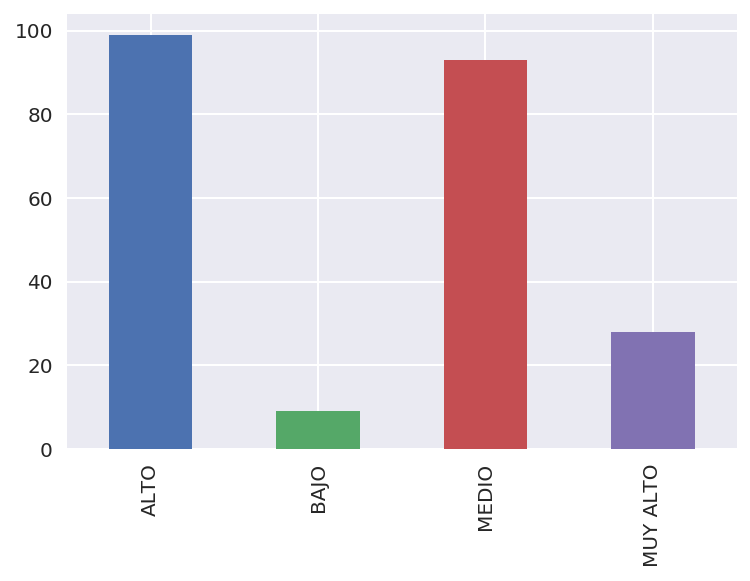

In [48]:
df_friaje['Nivel de Riesgo MINSA'].value_counts().sort_index().plot.bar()

In [54]:
set(df_zonas['DISTRITO']).difference(pd.concat((df_heladas['Distrito'], df_friaje['Distrito'])))

set()

In [56]:
set(df_tambos['Distrito']).difference(df_zonas['DISTRITO'])

set()

## Checkpoint

In [81]:
from preprocessing import fix_headers, preprocess_df

df_heladas = pd.read_excel('2017/DISTRITOS_PRIORIZADOS-POR-HELADAS.xlsx')
df_friaje = pd.read_excel('2017/DISTRITOS_PRIORIZADOS-POR-FRIAJE.xlsx')
df_tambos = pd.read_excel('2017/Anexo 4.xlsx')
df_zonas = pd.read_excel('2017/Anexo 2.xlsx')

df_heladas = fix_headers(df_heladas)
df_friaje = fix_headers(df_friaje)

for col in ['Departamento', 'Provincia', 'Distrito']:
    preprocess_df(df_heladas, col)
    preprocess_df(df_friaje, col)
    preprocess_df(df_tambos, col)
    
for col in ['DISTRITO', 'LOCAL DE DISTRIBUCIÓN DE BIENES', 'CCPP']:
    preprocess_df(df_tambos, col)
    
for col in ['DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'TAMBO/LOCAL PARA ENTREGA DE  BIENES']:
    preprocess_df(df_zonas, col)

In [95]:
# tambos asociados a regiones con friaje
set(df_tambos.apply(lambda row: f"{row['Departamento']}-{row['Provincia']}-{row['Distrito']}", axis=1)) \
    .difference(df_heladas.apply(lambda row: f"{row['Departamento']}-{row['Provincia']}-{row['Distrito']}", axis=1))

{'JUNIN-JAUJA-MONOBAMBA',
 'LORETO-MAYNAS-ALTO NANAY',
 'LORETO-MAYNAS-IQUITOS',
 'LORETO-MAYNAS-PUNCHANA',
 'PASCO-OXAPAMPA-CHONTABAMBA',
 'PASCO-OXAPAMPA-HUANCABAMBA',
 'PASCO-OXAPAMPA-OXAPAMPA',
 'PASCO-OXAPAMPA-PALCAZU',
 'PASCO-OXAPAMPA-POZUZO',
 'PASCO-OXAPAMPA-VILLA RICA'}

In [96]:
# df_heladas y df_friaje son excluyentes
set(df_heladas.apply(lambda row: f"{row['Departamento']}-{row['Provincia']}-{row['Distrito']}", axis=1)) \
    .intersection(set(df_friaje.apply(lambda row: f"{row['Departamento']}-{row['Provincia']}-{row['Distrito']}", axis=1)))

set()

In [97]:
ubicaciones_heladas = set(df_tambos.apply(lambda row: f"{row['Departamento']}-{row['Provincia']}-{row['Distrito']}", axis=1)) \
    .intersection(df_heladas.apply(lambda row: f"{row['Departamento']}-{row['Provincia']}-{row['Distrito']}", axis=1))

In [98]:
df = df_tambos[df_tambos.apply(lambda row: f"{row['Departamento']}-{row['Provincia']}-{row['Distrito']}" \
                               in ubicaciones_heladas, axis=1)]

In [106]:
df.to_csv('data/distritos_heladas.csv', index=False)